Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **5. studenog 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50)
    plt.xlabel("x1")
    plt.ylabel("x2")

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

w0: [2.1]
w1, w2:  [[-0.5 -0.1]]
accuracy:  1.0


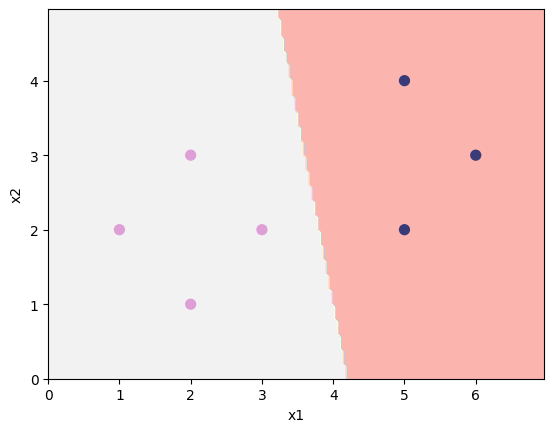

In [5]:
# Vaš kôd ovdje
r = RidgeClassifier(alpha=0)
r.fit(seven_X, seven_y)
print("w0:", r.intercept_)
print("w1, w2: ", r.coef_)
print("accuracy: ", accuracy_score(seven_y, r.predict(seven_X)))
plot_2d_clf_problem(seven_X, seven_y, r.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

w0: 1.55
w1, w2:  [-0.25 -0.05]
accuracy:  1.0


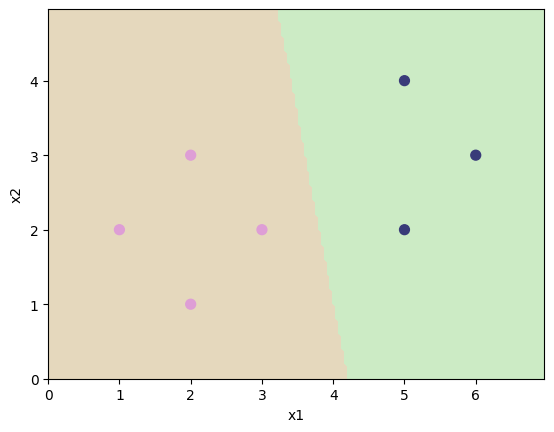

In [6]:
# Vaš kôd ovdje
reg = LinearRegression()
reg.fit(seven_X, seven_y)
print("w0:", reg.intercept_)
print("w1, w2: ", reg.coef_)
print("accuracy: ", accuracy_score(seven_y, reg.predict(seven_X) >= 0.5))
plot_2d_clf_problem(seven_X, seven_y, lambda x: reg.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

w0: [0.84938704]
w1, w2:  [[-0.4028021   0.30823117]]
accuracy:  0.875


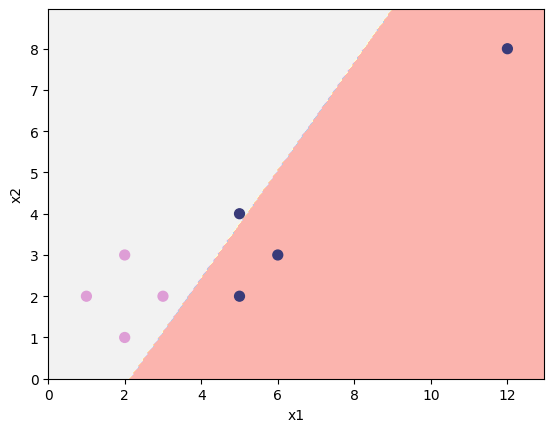

In [8]:
# Vaš kôd ovdje
r.fit(outlier_X, outlier_y)
print("w0:", r.intercept_)
print("w1, w2: ", r.coef_)
print("accuracy: ", accuracy_score(outlier_y, r.predict(outlier_X)))
plot_2d_clf_problem(outlier_X, outlier_y, r.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

w0: [1.50505051]
w1, w2:  [[-0.4040404  -0.08080808]]
accuracy:  0.875


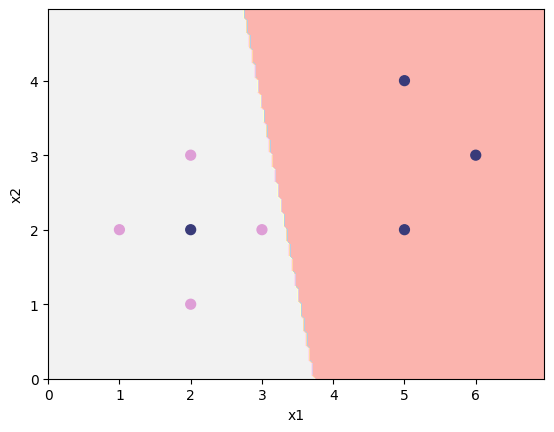

In [10]:
# Vaš kôd ovdje
r.fit(unsep_X, unsep_y)
print("w0:", r.intercept_)
print("w1, w2: ", r.coef_)
print("accuracy: ", accuracy_score(unsep_y, r.predict(unsep_X)))
plot_2d_clf_problem(unsep_X, unsep_y, r.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

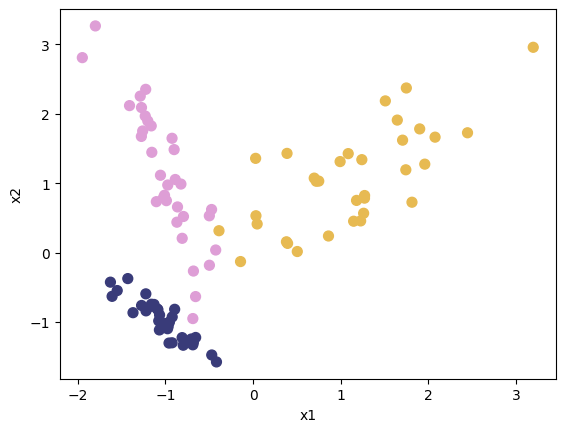

In [12]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X, y = make_classification(n_features=2,n_redundant=0,n_classes=3,n_clusters_per_class=1)
plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

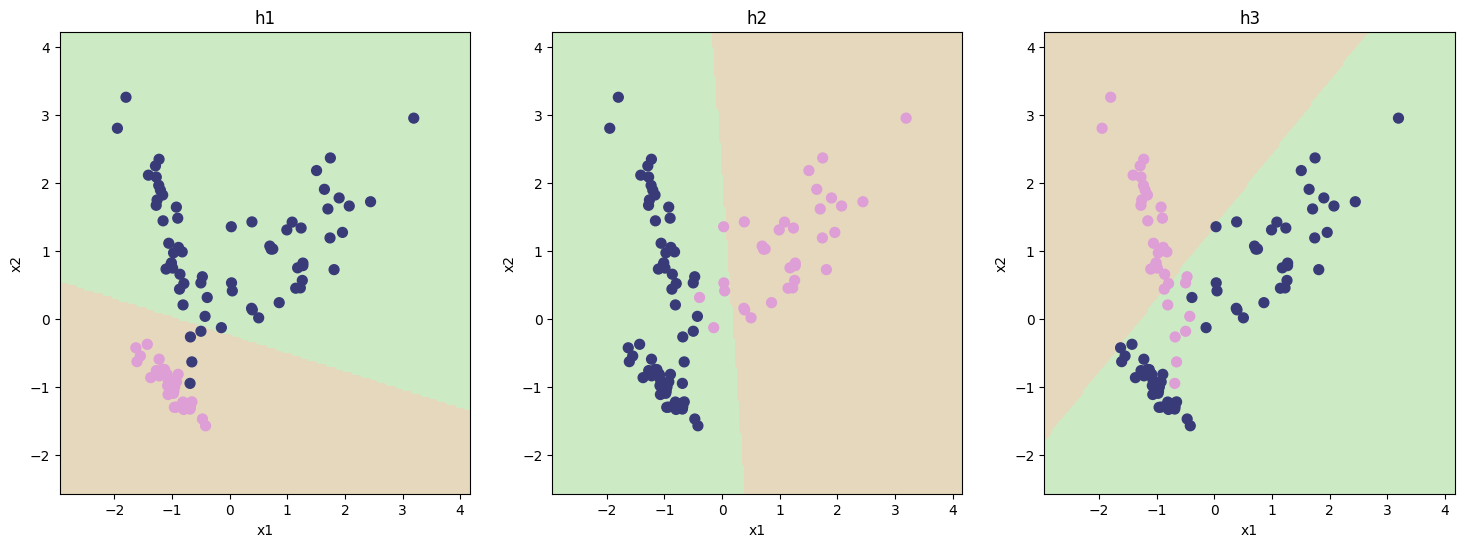

accuracy:  0.91
accuracy:  0.91


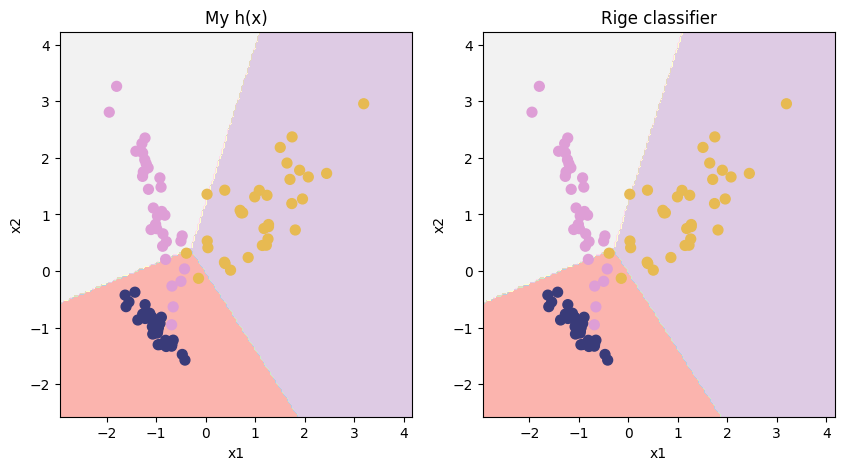

In [13]:
# Vaš kôd ovdje
y1 = np.array([1 if yi == 0 else 0 for yi in y])
y2 = np.array([1 if yi == 1 else 0 for yi in y])
y3 = np.array([1 if yi == 2 else 0 for yi in y])

h1 = LinearRegression().fit(X, y1)
h2 = LinearRegression().fit(X, y2)
h3 = LinearRegression().fit(X, y3)

plt.figure(figsize=(18, 6))
plt.subplot(131)
plot_2d_clf_problem(X, y1, lambda x: h1.predict(x) >= 0.5)
plt.title("h1")
plt.subplot(132)
plot_2d_clf_problem(X, y2, lambda x: h2.predict(x) >= 0.5)
plt.title("h2")
plt.subplot(133)
plot_2d_clf_problem(X, y3, lambda x: h3.predict(x) >= 0.5)
plt.title("h3")
plt.show()


def predict(x):
    first = h1.predict(x)
    second = h2.predict(x)
    third = h3.predict(x)
    result = np.zeros(len(x))
    
    for i in range(len(x)):
        maximum = max(first[i], second[i], third[i])
        if maximum == first[i]:
            result[i] = 0
        elif maximum == second[i]:
            result[i] = 1
        else:
            result[i] = 2
    return result
    

plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_2d_clf_problem(X, y, lambda x: predict(x))
plt.title("My h(x)")
print("accuracy: ", accuracy_score(y, predict(X)))

r = RidgeClassifier(alpha=0).fit(X, y)
plt.subplot(122)
plot_2d_clf_problem(X, y, r.predict)
plt.title("Rige classifier")
print("accuracy: ", accuracy_score(y, r.predict(X)))
plt.show()

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

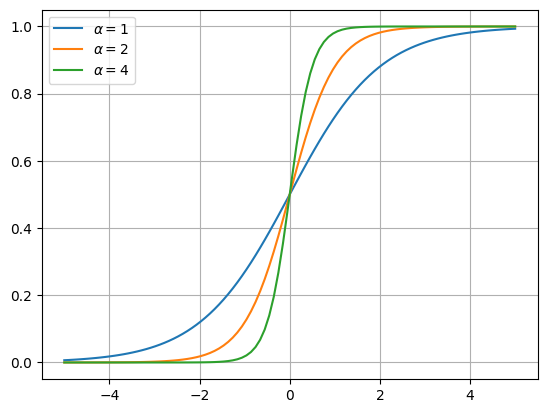

In [14]:
# Vaš kôd ovdje
def sigm(x, alpha=1):
    return 1 / (1 + np.exp(-alpha * x))

x = np.linspace(-5, 5, 100)
for a in [1,2,4]:
    plt.plot(x, [sigm(xi, alpha=a) for xi in x], label=r"$\alpha = {}$".format(a))
plt.legend()
plt.grid(True)
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [15]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x, w):
    return sigm(w.T @ x)

def cross_entropy_error(X, y, w):
    h = [lr_h(xi, w) for xi in X]
    return 1 / len(X) * np.sum([-yi * np.emath.log(h) - (1 - yi) * np.emath.log(1 - h) for yi, h in zip(y, h)])


def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    poly = PolynomialFeatures(1)
    X = poly.fit_transform(X)
    
    w = np.zeros(len(X[0]))
    last_e = cross_entropy_error(X, y, w)
    if trace:
        history = [w.copy()]

    for iter in range(max_iter):
        delta_w = np.zeros(len(X[0]))
        for xi, yi in zip(X, y):
            h = lr_h(xi, w)
            delta_w -= (h - yi) * xi
        w[0] += eta * delta_w[0]
        w[1:] = w[1:] * (1 - eta * alpha) + eta * delta_w[1:]
        
        if trace:
            history.append(w.copy())

        new_e = cross_entropy_error(X, y, w)
        if abs(last_e - new_e) < epsilon:
            print("Rješenje pronađeno u " + str(iter + 1) + " koraka.")
            return w, history if trace else w

        last_e = new_e
    
    print("Rješenje pronađeno u " + str(max_iter) + " koraka.")
    return w, history if trace else w

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [16]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Rješenje pronađeno u 947 koraka.
w:  [ 4.45449454 -1.71089242  0.68413507]
error:  0.13521872720206743
accuracy:  1.0


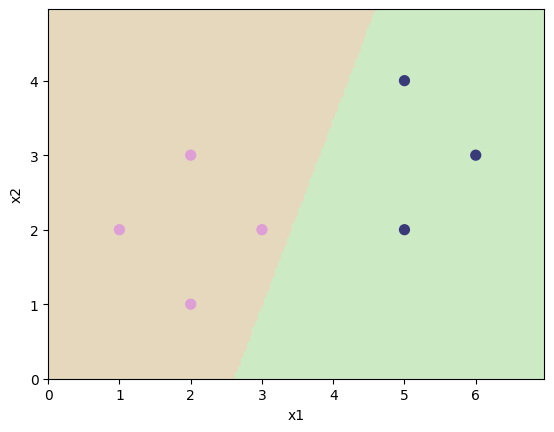

In [17]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
w, history = lr_train(seven_X, seven_y, trace=True)
error = cross_entropy_error(poly.fit_transform(seven_X), seven_y, w)
h = lambda x: lr_h(poly.fit_transform(x).T, w) >= 0.5
print("w: ", w)
print("error: ", error)
print("accuracy: ", accuracy_score(seven_y, h(seven_X)))
plot_2d_clf_problem(seven_X, seven_y, h)
plt.show()

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

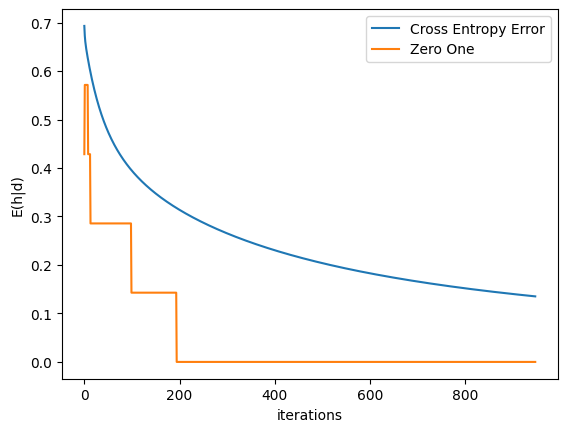

In [18]:
from sklearn.metrics import zero_one_loss
cross = [cross_entropy_error(poly.fit_transform(seven_X), seven_y, history[i]) for i in range(len(history))]

h_all = [lr_h(poly.fit_transform(seven_X).T, history[i]) >= 0.5 for i in range(len(history))]
zero_one = [zero_one_loss(seven_y, hi) for hi in h_all]

plt.plot(cross, label="Cross Entropy Error")
plt.plot(zero_one, label="Zero One")
plt.xlabel("iterations")
plt.ylabel("E(h|d)")
plt.legend()
plt.show()

Rješenje pronađeno u 1142 koraka.
Rješenje pronađeno u 947 koraka.
Rješenje pronađeno u 511 koraka.
Rješenje pronađeno u 378 koraka.


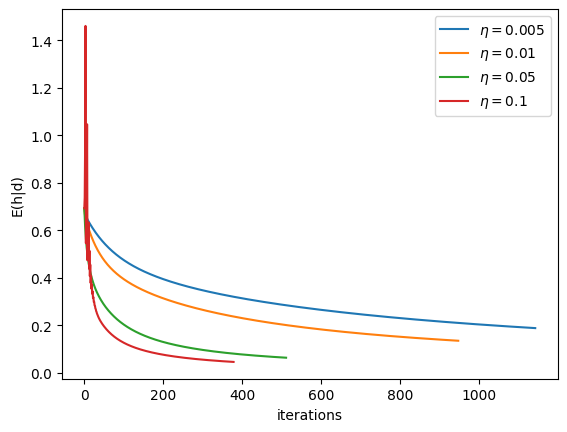

In [19]:
# Vaš kôd ovdje
etas = [0.005, 0.01, 0.05, 0.1]
for eta in etas:
    poly = PolynomialFeatures(1)
    w, history = lr_train(seven_X, seven_y, eta=eta, trace=True)
    error_s = [cross_entropy_error(poly.fit_transform(seven_X), seven_y, history[i]) for i in range(len(history))]
    plt.plot(error_s, label=r"$\eta = {}$".format(eta))
plt.xlabel("iterations")
plt.ylabel("E(h|d)")
plt.legend()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

w:  [ 5.33129609 -1.18244419 -0.30251926]
accuracy:  1.0
error:  9.992007221626415e-16


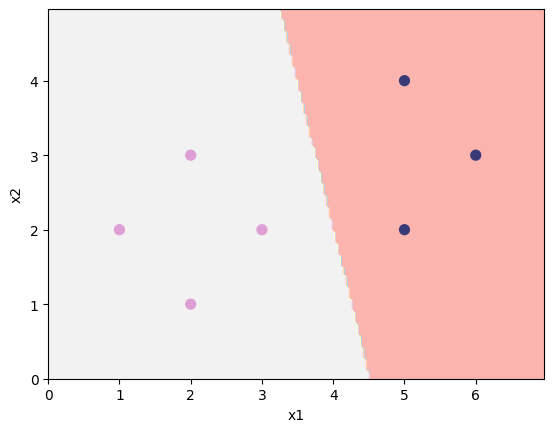

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
# Vaš kôd ovdje
clf = LogisticRegression(random_state=42).fit(seven_X, seven_y)
w = np.array([clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]])
error = log_loss(seven_y, clf.predict(seven_X) >= 0.5)
print("w: ", w)
print("accuracy: ", clf.score(seven_X, seven_y))
print("error: ", error)
plot_2d_clf_problem(seven_X, seven_y, clf.predict)
plt.show()

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [21]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

w:  [ 5.33162957 -1.18249684 -0.30258673]
accuracy:  1.0
error:  9.992007221626415e-16


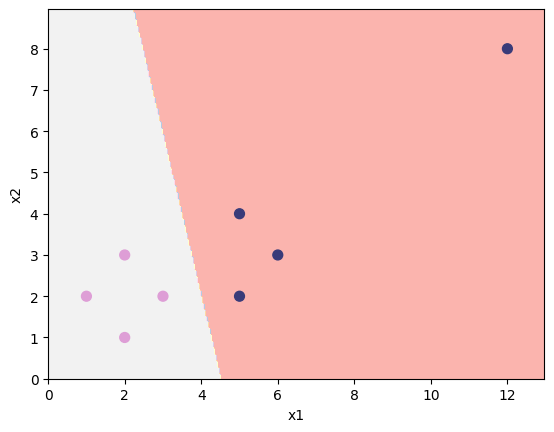

In [22]:
# Vaš kôd ovdje
clf = LogisticRegression(random_state=42).fit(outlier_X, outlier_y)
w = np.array([clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]])
error = log_loss(outlier_y, clf.predict(outlier_X) >= 0.5)
print("w: ", w)
print("accuracy: ", clf.score(outlier_X, outlier_y))
print("error: ", error)
plot_2d_clf_problem(outlier_X, outlier_y, clf.predict)
plt.show()

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

Rješenje pronađeno u 947 koraka.


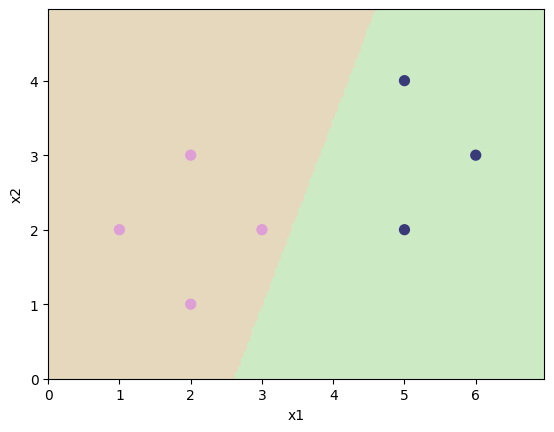

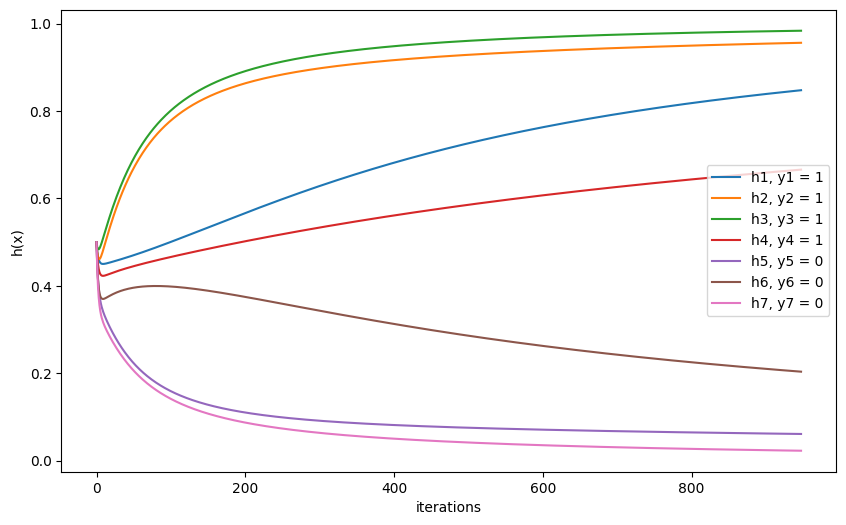

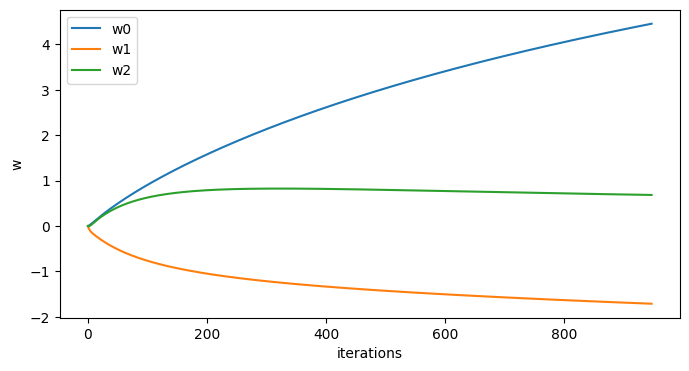

In [23]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
w, history = lr_train(seven_X, seven_y, trace=True)
h = lambda x: lr_h(poly.fit_transform(x).T, w) >= 0.5
plot_2d_clf_problem(seven_X, seven_y, h)
plt.show()

plt.figure(figsize=(10, 6))
values = np.zeros((len(history), len(seven_X)))
for i, curr_w in enumerate(history):
    values[i] = lr_h(poly.fit_transform(seven_X).T, curr_w)
values = values.T

for i in range(len(seven_X)):
    plt.plot(values[i], label=r"h{}, y{} = {}".format(i + 1, i + 1, seven_y[i]))
plt.xlabel("iterations")
plt.ylabel("h(x)")
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
weights = np.array(history).T
for i in range(len(weights)):
    plt.plot(weights[i], label=r"w{}".format(i))
plt.xlabel("iterations")
plt.ylabel("w")
plt.legend()
plt.show()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [24]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Rješenje pronađeno u 454 koraka.


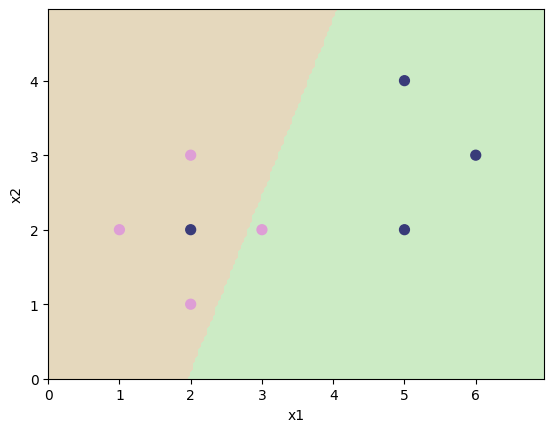

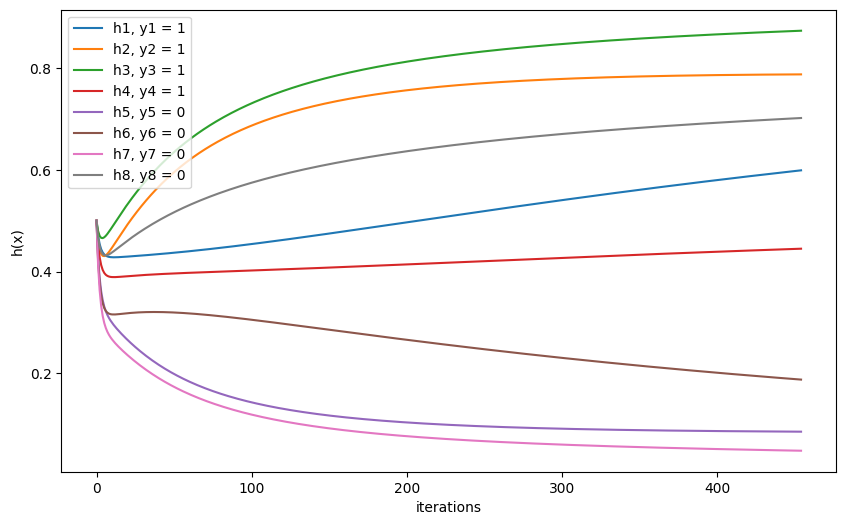

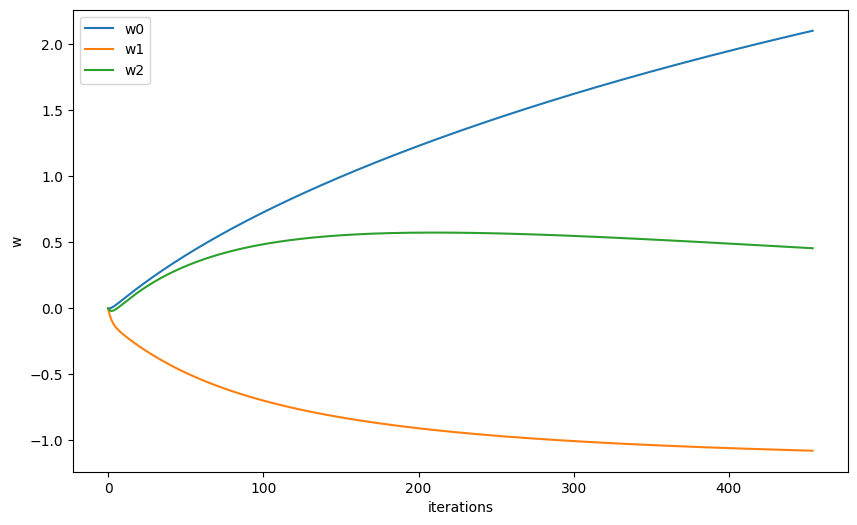

In [25]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
w, history = lr_train(unsep_X, unsep_y, trace=True)
h = lambda x: lr_h(poly.fit_transform(x).T, w) >= 0.5
plot_2d_clf_problem(unsep_X, unsep_y, h)
plt.show()

plt.figure(figsize=(10, 6))
values = np.zeros((len(history), len(unsep_X)))
for i, curr_w in enumerate(history):
    values[i] = lr_h(poly.fit_transform(unsep_X).T, curr_w)
values = values.T

for i in range(len(unsep_X)):
    plt.plot(values[i], label=r"h{}, y{} = {}".format(i + 1, i + 1, unsep_y[i]))
plt.xlabel("iterations")
plt.ylabel("h(x)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
weights = np.array(history).T
for i in range(len(weights)):
    plt.plot(weights[i], label=r"w{}".format(i))
plt.xlabel("iterations")
plt.ylabel("w")
plt.legend()
plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [26]:
from numpy.linalg import norm

Rješenje pronađeno u 947 koraka.
Rješenje pronađeno u 804 koraka.
Rješenje pronađeno u 405 koraka.
Rješenje pronađeno u 4 koraka.


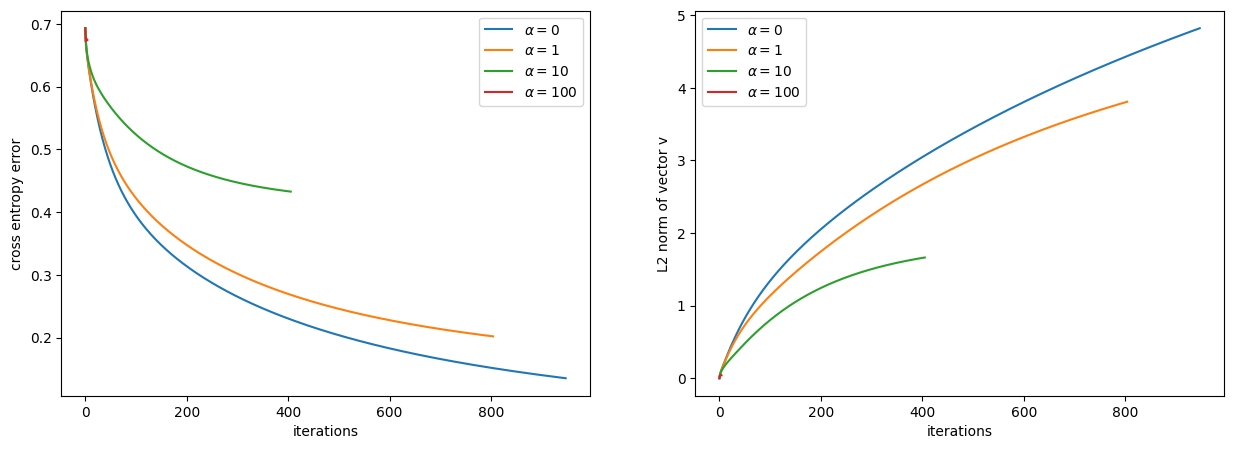

In [27]:
# Vaš kôd ovdje
alphas = [0, 1, 10, 100]
poly = PolynomialFeatures(1)
plt.figure(figsize=(15, 5))

for alpha in alphas:
    w, history = lr_train(seven_X, seven_y, trace=True, alpha=alpha)
    errors = np.array([(cross_entropy_error(poly.fit_transform(seven_X), seven_y, curr_w), norm(curr_w)) for curr_w in history])
    
    plt.subplot(121)
    plt.plot(errors[:, 0], label=r"$\alpha = {}$".format(alpha))
    plt.subplot(122)
    plt.plot(errors[:, 1], label=r"$\alpha = {}$".format(alpha))

plt.subplot(121)
plt.xlabel("iterations")
plt.ylabel("cross entropy error")
plt.legend()
plt.subplot(122)
plt.xlabel("iterations")
plt.ylabel("L2 norm of vector v")
plt.legend()
plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

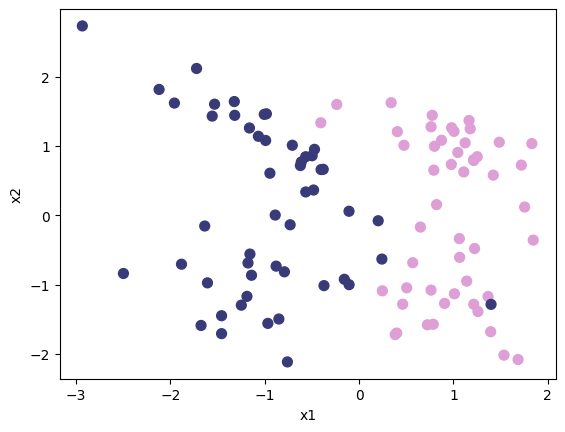

In [28]:
from sklearn.preprocessing import PolynomialFeatures
X, y = make_classification(n_samples=100,n_features=2,n_redundant=0,n_classes=2,n_clusters_per_class=2)
plot_2d_clf_problem(X, y)
#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

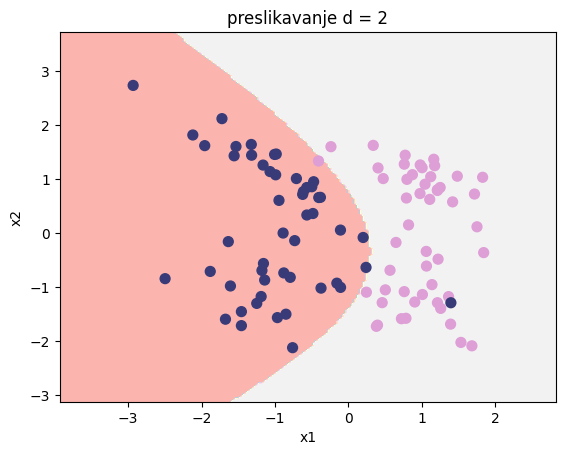

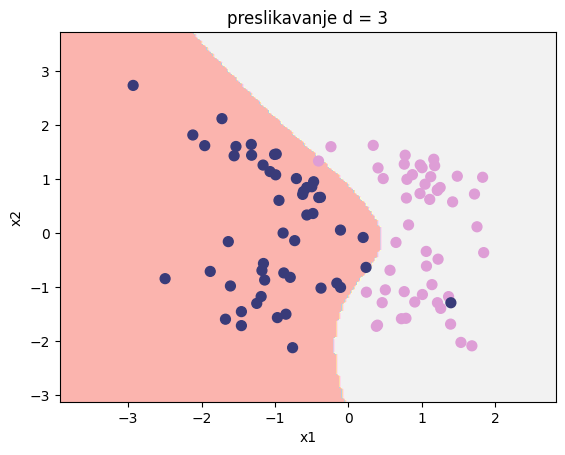

In [29]:
from sklearn.datasets import make_classification
# Vaš kôd ovdje
logistic_regression = LogisticRegression()
poly1 = PolynomialFeatures(2)
poly2 = PolynomialFeatures(3)

logistic_regression.fit(poly1.fit_transform(X), y)
plot_2d_clf_problem(X, y, lambda x: logistic_regression.predict(poly1.transform(x)))
plt.title("preslikavanje d = 2")
plt.show()

logistic_regression.fit(poly2.fit_transform(X), y)
plot_2d_clf_problem(X, y, lambda x: logistic_regression.predict(poly2.transform(x)))
plt.title("preslikavanje d = 3")
plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?